<center><h1> Sentiment Analysis Project </h1></center> <br>
<center><h2> Sentiment Analysis of Tweets During 2020 US Presidential Elections </h2></center>
<br>
<br>
<br>



<h3> Table of Content </h3>

1. .[Concept and Understanding of the Data](#1)

     
2. .[Data Pre-processing](#2)
     - 2.1 .[Downloading relevant python libraries](#2.1)
     - 2.2 .[Running the dataset using the github path](#2.2)
     - 2.3 .[Data Cleaning](#2.3)
     - 2.4 .[Exploratory Data Analysis](#2.4)
     
     
3. .[Sentiment Analysis](#3)

    - 3.1 .[Vader Sentiment Analyzer](#3.1)
    


<a id='1'><h2><font color='#20368F'>1. Concept and Understanding of the Data</font> </h2>

We are conducting a simple exploratory data analysis and sentiment analysis using the US presidential dataset.

The dataset is obtained from https://www.kaggle.com/techykajal/us-election-using-twitter-sentiment-analysis.

The original owner of the dataset scraped tweets mentioning Donald Trump and Joe Biden separately for a week using python.

The overall aim of the project is to provide simple data visualizations and look for the sentiments of people towards both Donald Trump and Joe Biden


<a id='2'> <h2><font color='#20368F'> 2. Data Processing </font></h2>



<a id='2.1'><font color='salmon'><h3>2.1 Downloading relevant python libraries </h3></font> </a>

In [52]:
import pandas as pd
import requests
import io
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter

<a id='2.2'><font color='salmon'><h3>2.2  Running the dataset using the github path </h3></font> </a>

<b> Steps Undertaken </b>

- Running the file

In [28]:
df=pd.read_csv('https://raw.githubusercontent.com/PritamGuha31/Sentiment-Analysis-on-Twitter-data-ahead-of-2020-US-Elections/main/tweets_election.csv')

df.head(5)

,Unnamed: 0,geo,text,user,location,Subject,state
0,3,NaN,After the confrontation that cost Walter Wall...,wheresestela1,New Jersey,Donald Trump,New Jersey
1,6,NaN,"""COVID-19 is still raging. Trump is still lyi...",TheFemaleYungin,"The Wrong Address, Texas",Donald Trump,Texas
2,11,NaN,"Donald Trump Jr.: ""Why aren't they talking ab...",KathrynTomashu1,"Northborough, MA",Donald Trump,Massachusetts
3,15,NaN,Let’s not forget who created these problems. T...,ajserino,"New Jersey, USA",Donald Trump,New Jersey
4,16,NaN,There is no greater supporter of Donald Trump...,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota


In [ ]:
#sns.palplot(['#8382ff', '#5f90ff', '#92b6f0','#ffd7b5','#ffb38a','#ffd7b5'])

#plt.title("Colour palette ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
#plt.show()

<a id='2.3'><font color='salmon'><h3>2.3  Data Cleaning </h3></font> </a>

In [29]:
#dropping first two variables (columns) which are redundant

df.drop(df.columns[0:2],axis=1,inplace=True)
df.head()

,text,user,location,Subject,state
0,After the confrontation that cost Walter Wall...,wheresestela1,New Jersey,Donald Trump,New Jersey
1,"""COVID-19 is still raging. Trump is still lyi...",TheFemaleYungin,"The Wrong Address, Texas",Donald Trump,Texas
2,"Donald Trump Jr.: ""Why aren't they talking ab...",KathrynTomashu1,"Northborough, MA",Donald Trump,Massachusetts
3,Let’s not forget who created these problems. T...,ajserino,"New Jersey, USA",Donald Trump,New Jersey
4,There is no greater supporter of Donald Trump...,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota


In [125]:
#next step is to clean the text. A function is created to:

# Conversion of uppercase into lowercase in all columns
#removing any special characters that have no inherent meaning from the text columns
# removing any alpha-numeric characters from the text columns


#emoji_pattern = r'/[x{1F601}-x{1F64F}]/u'
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)




def cleaner(df):
    for i,k in df.iterrows():
        
        k=k.str.lower()
        k.text=k.text.replace('[^A-Za-z0-9]+','')
        k.text=k.text.replace('-'," ")
        k.text=k.text.replace('.',' ')
        k.text=k.text.replace('!',' ')
        k.text=k.text.replace(',',' ')
        k.text=k.text.replace(':',' ')
        k.text=k.text.replace(';',' ')
        k.text=k.text.replace('"',' ')
        k.text=k.text.replace('''!()-[]{};:'"\,<>./?@#$%^&*_~''',' ')
        k.text=k.text.strip()
        
        new_df=pd.DataFrame([k.text])
    
    return new_df
    
    

In [ ]:
cleaner(df)

<a id='2.4'> <h3><font color='salmon'>2.4 Exploratory Data Analysis</font> </h3> </a>

<b> Distribution of Tweets Between Joe Biden and Donald Trump </b>

In [137]:
x=df.groupby(['Subject']).count()['text']
y=len(df)
r=(x/y).round(2)
r

#or

r=df.groupby(['Subject']).count()['text'].div(len(df)).round(2)
display(r)

ratio_of_tweets=pd.DataFrame(r).T
display(ratio_of_tweets)

Subject
Donald Trump    0.53
Joe Biden       0.47
Name: text, dtype: float64

In [183]:
ratio_of_tweets

Subject,Donald Trump,Joe Biden
text,0.53,0.47


<b> Visualization of Distribution of Tweets between Joe Biden and Donald Trump </b>



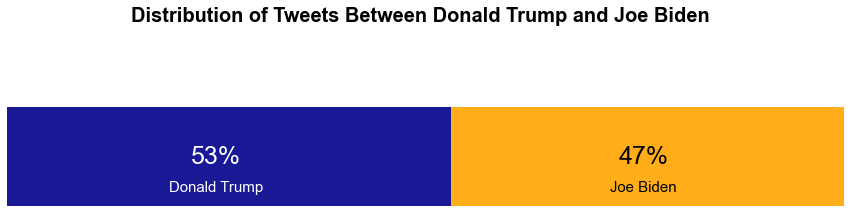

In [629]:
#figure alignment
fig,ax=plt.subplots(1,1,figsize=(15,2))

#visualization
ax.barh(ratio_of_tweets.index, ratio_of_tweets['Donald Trump'], 
        color='darkblue', alpha=0.9, label='D')
ax.barh(ratio_of_tweets.index, ratio_of_tweets['Joe Biden'], left=ratio_of_tweets['Donald Trump'], 
        color='orange', alpha=0.9, label='J')

ax.set_xlim(0, 1)

#this is done to remove axes
ax.set_yticks([''])
ax.set_xticks([])

#plotting percentages for Donald Trump

for i in ratio_of_tweets.index:
    ax.annotate(f"{int(ratio_of_tweets['Donald Trump'][i]*100)}%",
                xy=(0.22,i),
               va='center',fontsize=25,
               fontfamily='arial',
               color='white')
    ax.annotate("Donald Trump",xy=(0.25,-0.25),
                va='center',ha='center',color='white',
                
        
                fontsize=15,fontfamily='arial'
                
            
               )
    
#plotting percentages for Joe Biden
    
for i in ratio_of_tweets.index:
    ax.annotate(f"{int(ratio_of_tweets['Joe Biden'][i]*100)}%",
                xy=(0.73,i),
               va='center',fontsize=25,
               fontfamily='arial',
               color='black')
    ax.annotate("Joe Biden",xy=(0.76,-0.25),
                va='center',ha='center',
                
        
                fontsize=15,fontfamily='arial'
                    
               )    

#plotting titles
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

fig.text(0.24,1.44,'Distribution of Tweets Between Donald Trump and Joe Biden',size=20,fontfamily='arial',fontweight='bold')
#plot subtext here


plt.show()

    


<b> Visualization of the most active state </b>

<ipython-input-875-c7b4f1a9c03b>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(active_states.index,font='arial',rotation='45',fontsize=12)


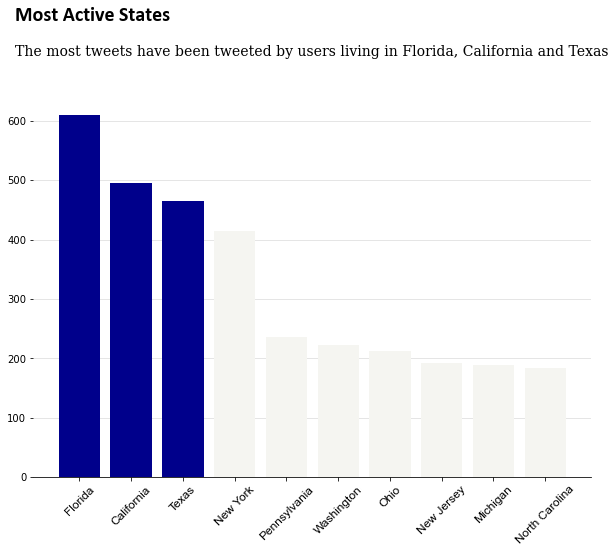

In [875]:
active_states=df.groupby(['state']).text.count().sort_values(ascending=False)[:10]


color_map=['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  'darkblue' # color highlight

fig,ax=plt.subplots(1,1,figsize=(10,7))

ax.bar(active_states.index,active_states,color=color_map)

#removing borders
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
    
ax.set_xticklabels(active_states.index,font='arial',rotation='45',fontsize=12)


#title
fig.text(0.10,1.03,'Most Active States',fontsize=20,fontfamily='calibri',fontweight='bold')

#subtitle
fig.text(0.10,0.96,'The most tweets have been tweeted by users living in Florida, California and Texas',
        fontfamily='serif',fontsize=14,fontweight='light')



ax.set_axisbelow(True) #this moves gridlines behind the graph elements
ax.grid(axis='y', linestyle='-', alpha=0.4) #plotting gridlines

#adding lines

plt.show()
  

<b> visualization of the least active state </b>

<ipython-input-876-2f99667f1fdb>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(least_active_states.index,font='arial',rotation='45',fontsize=12)


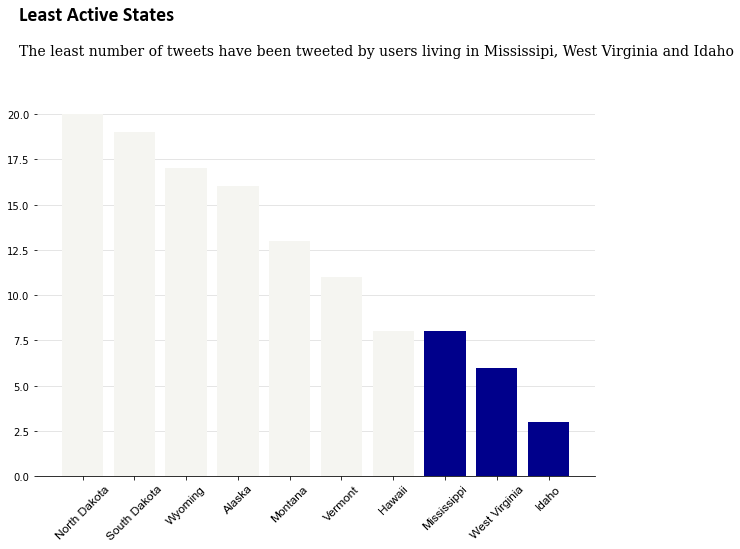

In [876]:
least_active_states=df.groupby(['state']).text.count().sort_values(ascending=True)[:10]
least_active_states


color_map=['#f5f5f1' for _ in range(10)]
color_map[7] = color_map[8] = color_map[9] =  'darkblue' # color highlight

fig,ax=plt.subplots(1,1,figsize=(10,7))
ax.bar(least_active_states.index[::-1],least_active_states[::-1],color=color_map)



#removing borders
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
    
ax.set_xticklabels(least_active_states.index,font='arial',rotation='45',fontsize=12)

#title
fig.text(0.10,1.03,'Least Active States',fontsize=20,fontfamily='calibri',fontweight='bold')

#subtitle
fig.text(0.10,0.96,'The least number of tweets have been tweeted by users living in Mississipi, West Virginia and Idaho',
        fontfamily='serif',fontsize=14,fontweight='light')




ax.set_axisbelow(True) #this moves gridlines behind the graph elements
ax.grid(axis='y', linestyle='-', alpha=0.4) #plotting gridlines

#adding lines

plt.show()
  

<h2><font color='salmon'> Kernel Distribution of the number of tweets posted by each user </h2>

<b><font color='salmon'> No of Tweets related to Biden per user </b>

In [552]:
df[df['Subject']=='Joe Biden'].groupby(['user'])['text'].count().sort_values(ascending=False)

user
urbanphotogal    35
sophiatseliem     5
ken_duda          4
sandiv11          4
benjred           4
                 ..
dolliod           1
don_easton        1
donlinka          1
dontholdmebak     1
10100WBK          1
Name: text, Length: 2368, dtype: int64

<b><font color='salmon'> Plotting of the Kernel Distribution </b>

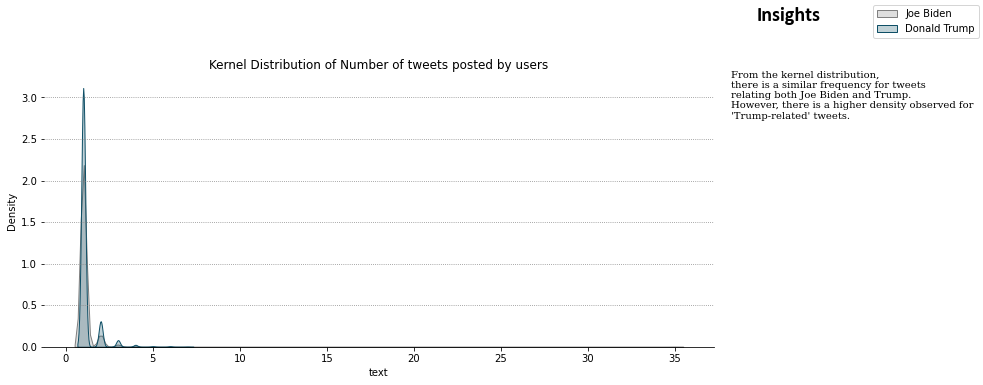

In [549]:
fig, ax=plt.subplots(1,1, figsize=(12,5))
line_ax = ax
line_ax.set_title('Kernel Distribution of Number of tweets posted by users')

#removing borders
for s in ['top', 'left', 'right']:
    line_ax.spines[s].set_visible(False)
    
#grid 
line_ax.grid(color='gray', linestyle=':', axis='y', zorder=0)
sns.kdeplot(df[df['Subject']=='Joe Biden'].groupby(['user'])['text'].count(), shade=True, color='gray', label='Biden Dataset', ax=line_ax)
sns.kdeplot(df[df['Subject']=='Donald Trump'].groupby(['user'])['text'].count(), shade=True, color='#0e4f66', label='Trump Dataset', ax=line_ax)
fig.legend(labels=['Joe Biden','Donald Trump'])


#text code
fig.text(0.95,1.03, 'Insights', fontsize=20, fontweight='bold', fontfamily='calibri')
fig.text(0.92,0.73,'''From the kernel distribution, 
there is a similar frequency for tweets 
relating both Joe Biden and Trump. 
However, there is a higher density observed for 
'Trump-related' tweets.
''',fontfamily='serif',fontsize=10,fontweight='light')


plt.show()




<h3><font color='salmon'> Tweets Mentioning Each Candidate by Country </h3>

In [614]:
#merging both trump and biden mentioned states and merging them

trump_biden=pd.merge(df[df['Subject']=='Donald Trump']['state'].value_counts(),
         df[df['Subject']=='Joe Biden']['state'].value_counts(),
         right_index=True,
         left_index=True).rename(columns={'state_x':'Donald Trump','state_y':
                                         'Joe Biden'})

In [631]:
trump_biden.head()

,Donald Trump,Joe Biden
Florida,378,232
California,225,270
New York,224,191
Texas,222,243
Pennsylvania,135,101


Text(0.5, 1.0, 'Comparison of Tweet Mentions of Donald Trump and Joe Biden')

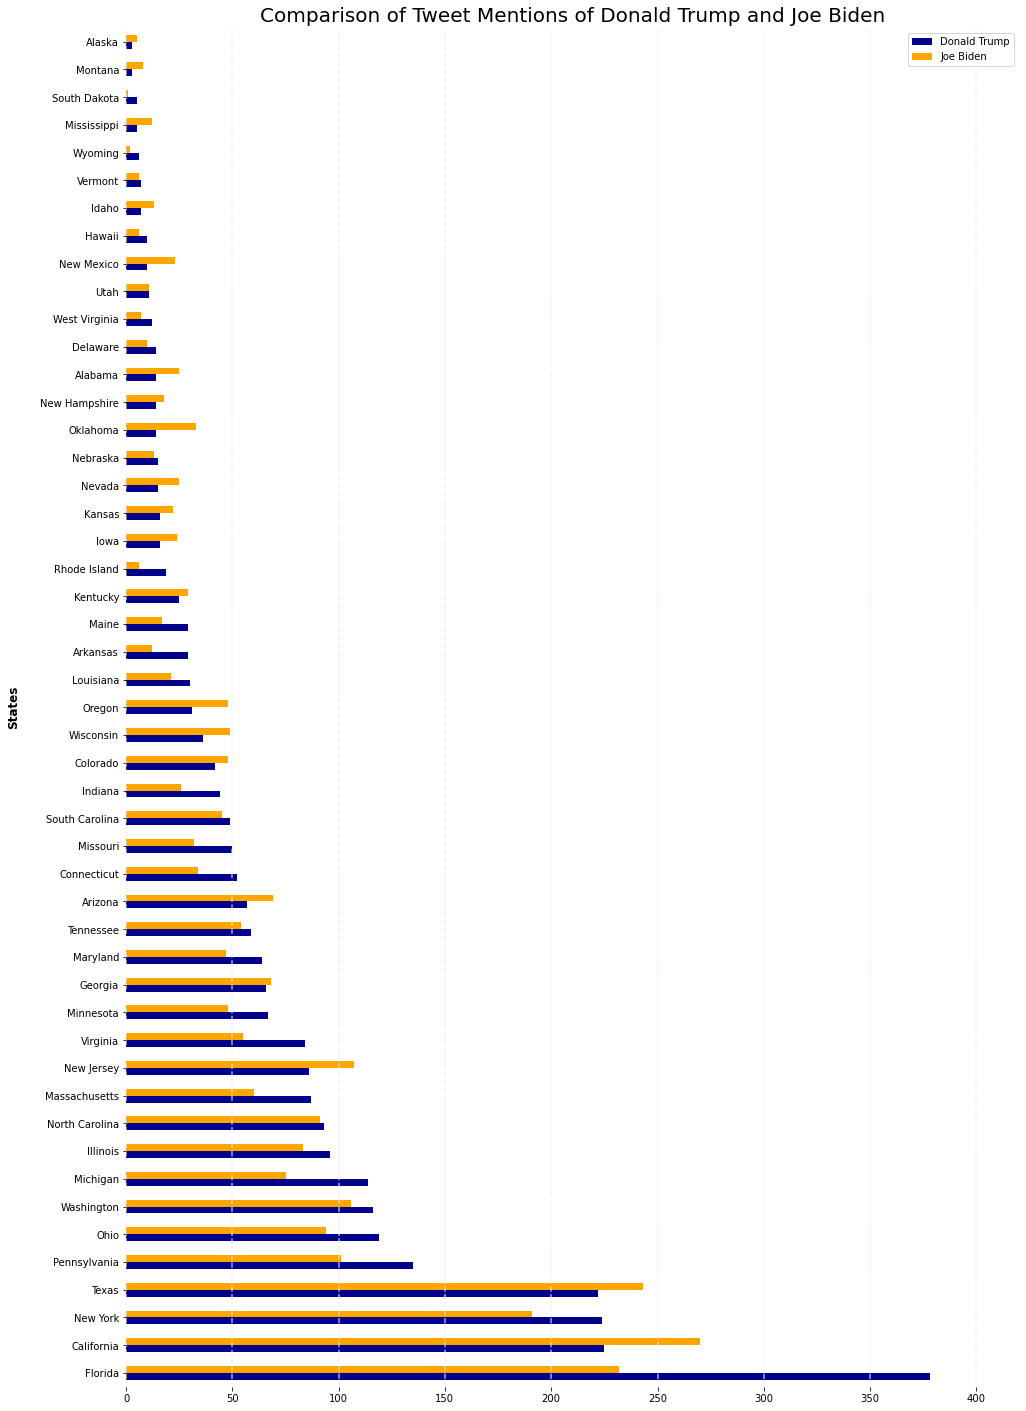

In [641]:

ax = trump_biden.plot(kind='barh', figsize=(16, 25),
                      color=['darkblue', 'orange'],zorder=2)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Replacing ticks with horizontal lines
vals = ax.get_xticks()
for tick in vals:
      ax.axvline(x=tick, linestyle='--', alpha=0.7, color='#eeeeee', zorder=2)
        
            
        

# Set y-axis label
ax.set_ylabel("States", labelpad=20, weight='bold', size=12)
ax.set_title('Comparison of Tweet Mentions of Donald Trump and Joe Biden', size=20)

<b> Insights: </b>
    
   - Higher number of tweets coming from Flordia mention Donald Trump while California has a higher mention of Joe Biden
    
   - The State of California has a higher mention of Joe Biden
    
   - Though Florida is a red state and California a blue state, it does not correlate to tweets tweeted in favour of the candidates. For example, New York is predominantly a blue state that is democratic. Yet, it had a higher mention of Donald Trump than Joe Biden

<h1><font color='#20368F'> What's Next</font> </h1>

Leading to the previous insights uncovered, we now would dwelve into the tweets and the tone behind such tweets.
We will be analysing the sentiment and uncovering if the tweets were in favour of the candidates or vice versa

<a id='3'> <h2><font color='#20368F'> 3. Sentiment Analysis </font></h2>

</a>

We use the VADER Sentiment Analyzer in order to perform the sentiment analysis. 

VADER is the abbreviated term for Valence Aware Dictionary and Sentiment Reasoner. It is a lexicon and a rule-based sentiment analysis tool that is specially designed to extract sentiments expressed in social media (especially twitter).

VADER categorizes a sentiment as positive/negative and provides us with a metric of how positive or negative a score is



In [642]:
#importing the necessary packages

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\subar\AppData\Roaming\nltk_data...


True

In [644]:
si= SentimentIntensityAnalyzer()

In [652]:
#separating both trump and biden tweets through a dataframe

trump_tweets=df[df['Subject']=='Donald Trump']
Biden_tweets=df[df['Subject']=='Joe Biden']

In [657]:
trump_tweets['sentiments']=trump_tweets['text'].apply(lambda x:si.polarity_scores(x))
Biden_tweets['sentiments']=Biden_tweets['text'].apply(lambda x:si.polarity_scores(x))

<ipython-input-657-88e6b215f36d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trump_tweets['sentiments']=trump_tweets['text'].apply(lambda x:si.polarity_scores(x))


In [662]:
print('Donald Trump Sentiments')
display(trump_tweets.head(2))

print('Joe Biden Sentiments')
Biden_tweets.head(2)


Donald Trump Sentiments


,text,user,location,Subject,state,sentiments
0,After the confrontation that cost Walter Wall...,wheresestela1,New Jersey,Donald Trump,New Jersey,"{'neg': 0.181, 'neu': 0.819, 'pos': 0.0, 'comp..."
1,"""COVID-19 is still raging. Trump is still lyi...",TheFemaleYungin,"The Wrong Address, Texas",Donald Trump,Texas,"{'neg': 0.327, 'neu': 0.673, 'pos': 0.0, 'comp..."


Joe Biden Sentiments


,text,user,location,Subject,state,sentiments
2928,Unfortunately she along with other politicia...,gmollo1115,"Georgia, USA",Joe Biden,Georgia,"{'neg': 0.341, 'neu': 0.659, 'pos': 0.0, 'comp..."
2929,Let’s talk about the Hunter laptop and such. ...,mcritter61,"Houston, TX",Joe Biden,Texas,"{'neg': 0.146, 'neu': 0.758, 'pos': 0.096, 'co..."


<b> <font color='salmon'>Creating to Python function to apply how positive or negative a sentiment is </b>

In [704]:
def sentiment_overall(sentiment):
    
    if sentiment['compound'] >= 0.05:
        return "Positive"
    elif sentiment['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"
    
 


In [861]:
trump_tweets['sentiment_overall'] = trump_tweets['sentiments'].apply(lambda x: sentiment_overall(x))
Biden_tweets['sentiment_overall'] = Biden_tweets['sentiments'].apply(lambda x: sentiment_overall(x))

,state,text
0,Alabama,39
1,Alaska,8
2,Arizona,126
3,Arkansas,41
4,California,495


<b><font color='salmon'> Sentiment of Tweets by Candidate </b>

Text(0.5, 1.0, 'Sentiment of Tweets of Donald Trump')

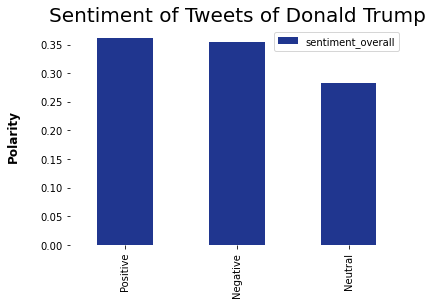

In [877]:
ax = pd.DataFrame(trump_tweets['sentiment_overall'].value_counts()/(2928)).plot(kind='bar',
                                                                           
                                                                           
                                                                           color='#20368F')

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Replacing ticks with horizontal lines
vals = ax.get_xticks()
for tick in vals:
      ax.axvline(x=tick, linestyle='none', alpha=0.7, color='#eeeeee', zorder=2)
        
            
        

# Set y-axis label
ax.set_ylabel("Polarity", labelpad=20, weight='bold', size=12)
ax.set_title('Sentiment of Tweets of Donald Trump', size=20)

Text(0.5, 1.0, 'Sentiment of Tweets of Joe Biden')

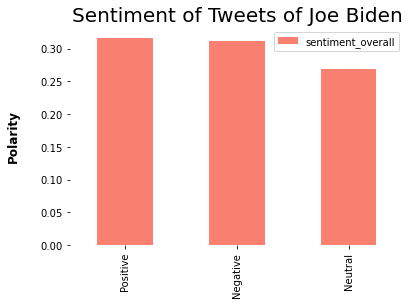

In [872]:
ax = pd.DataFrame(Biden_tweets['sentiment_overall'].value_counts()/(2928)).plot(kind='bar',
                                                                           
                                                                           
                                                                           color='salmon')

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Replacing ticks with horizontal lines
vals = ax.get_xticks()
for tick in vals:
      ax.axvline(x=tick, linestyle='none', alpha=0.7, color='#eeeeee', zorder=2)
        
            
        

# Set y-axis label
ax.set_ylabel("Polarity", labelpad=20, weight='bold', size=12)
ax.set_title('Sentiment of Tweets of Joe Biden', size=20)

<b> Insights </b>: From applying polarity scores, it can seen that there is an even distribution of sentiments
    for tweets mentioning both Donald Trump and Joe Biden. This way, we can conclude that neither of the candidate has a overall positive
    or negative appeal from the American people
    
    

In [763]:
final_df=pd.concat([Biden_tweets,trump_tweets], axis=0)

<b><font color='salmon'> Overall sentiment divided by States for Both Biden and Donald Trump </b>

In [818]:
Biden_tweets.groupby(['state','sentiment_overall']).count()['text'].unstack()

sentiment_overall,Negative,Neutral,Positive
state,,,
Alabama,10.0,9.0,6.0
Alaska,2.0,1.0,2.0
Arizona,24.0,18.0,27.0
Arkansas,3.0,4.0,5.0
California,115.0,68.0,87.0
Colorado,17.0,13.0,18.0
Connecticut,13.0,11.0,10.0
Delaware,4.0,3.0,3.0
Florida,73.0,86.0,73.0


<b> Insights: </b>
    
   - From the table above, it can be seent that California, New York and Texas have a higher number of tweets in favour and against Joe Biden
   - Similar to the overall distribution of sentiment across states, it can be said that equal proportion of tweets were positive and negative statewise

In [820]:
trump_tweets.groupby(['state','sentiment_overall']).count()['text'].unstack()

sentiment_overall,Negative,Neutral,Positive
state,,,
Alabama,4.0,3.0,7.0
Alaska,NaN,1.0,2.0
Arizona,17.0,20.0,20.0
Arkansas,6.0,12.0,11.0
California,87.0,51.0,87.0
Colorado,14.0,9.0,19.0
Connecticut,19.0,17.0,16.0
Delaware,4.0,6.0,4.0
Florida,128.0,111.0,139.0


<b> Insights </b>

 - In the case of Donald Trump, more positive tweets are tweeted in favour of Donald Trump, Pennsylvania, Iowa, Texas
 - However, there are almost equal proportion of negative and positive tweets coming from New York and California
 - States such as Maryland and Utah have a higher proportion of negative tweets